In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ca_merged_df = pd.read_csv('voter_turnout_merged_california.csv')
ca_merged_df.head()

,Residence_Addresses_City,elec_date,elec_year,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,...,CommercialData_EstimatedHHIncomeAmount,total_voters_college,total_voters_no_college,voted_voters_college,voted_voters_no_college,perc_turnout_college,perc_turnout_no_college,mean_age,voter_population,voted_voters
0,Oakland,2020_11_03,2020,General,30600.0,61476.0,37174.0,8628.0,83122.0,23041.0,...,115534.731762,80668.0,27989.0,71356.0,22543.0,0.884564,0.805424,47.829424,331652,172221.0
1,Oakland,2018_11_06,2018,General,30600.0,61476.0,37174.0,8628.0,83122.0,14972.0,...,115534.731762,80668.0,27989.0,59248.0,17372.0,0.734467,0.620672,48.224196,331652,130249.0
2,Oakland,2016_11_08,2016,General,30600.0,61476.0,37174.0,8628.0,83122.0,16057.0,...,115534.731762,80668.0,27989.0,60766.0,18951.0,0.753285,0.677087,46.819512,331652,135633.0
3,Oakland,2014_11_04,2014,General,30600.0,61476.0,37174.0,8628.0,83122.0,8145.0,...,115534.731762,80668.0,27989.0,38216.0,10811.0,0.473744,0.386259,51.034918,331652,75153.0
4,Oakland,2021_11_02,2021,Consolidated_General,30600.0,61476.0,37174.0,8628.0,83122.0,1.0,...,115534.731762,80668.0,27989.0,2.0,1.0,0.000025,0.000036,55.732444,331652,7.0


### Plot turnout by election type

In [3]:
ca_merged_df['total_turnout'] = ca_merged_df['voted_voters'] / ca_merged_df['voter_population']
ca_merged_df.head()

,Residence_Addresses_City,elec_date,elec_year,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,...,total_voters_college,total_voters_no_college,voted_voters_college,voted_voters_no_college,perc_turnout_college,perc_turnout_no_college,mean_age,voter_population,voted_voters,total_turnout
0,Oakland,2020_11_03,2020,General,30600.0,61476.0,37174.0,8628.0,83122.0,23041.0,...,80668.0,27989.0,71356.0,22543.0,0.884564,0.805424,47.829424,331652,172221.0,0.519282
1,Oakland,2018_11_06,2018,General,30600.0,61476.0,37174.0,8628.0,83122.0,14972.0,...,80668.0,27989.0,59248.0,17372.0,0.734467,0.620672,48.224196,331652,130249.0,0.392728
2,Oakland,2016_11_08,2016,General,30600.0,61476.0,37174.0,8628.0,83122.0,16057.0,...,80668.0,27989.0,60766.0,18951.0,0.753285,0.677087,46.819512,331652,135633.0,0.408962
3,Oakland,2014_11_04,2014,General,30600.0,61476.0,37174.0,8628.0,83122.0,8145.0,...,80668.0,27989.0,38216.0,10811.0,0.473744,0.386259,51.034918,331652,75153.0,0.226602
4,Oakland,2021_11_02,2021,Consolidated_General,30600.0,61476.0,37174.0,8628.0,83122.0,1.0,...,80668.0,27989.0,2.0,1.0,0.000025,0.000036,55.732444,331652,7.0,0.000021


In [4]:
avg_turnout_by_election_type = ca_merged_df.groupby(['elec_type']).mean()['total_turnout']
avg_turnout_by_election_type

elec_type
Consolidated_General    0.008132
General                 0.434623
Local_or_Municipal      0.001209
Name: total_turnout, dtype: float64

Text(0.5, 1.0, 'Average turnout by election (California)')

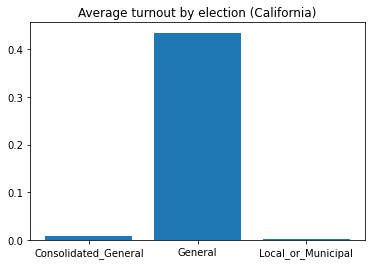

In [5]:
plt.bar(['Consolidated_General', 'General', 'Local_or_Municipal'], avg_turnout_by_election_type)
plt.title('Average turnout by election (California)')

### Plot turnout by election type (RCV vs. Non-RCV)

In [12]:
rcv_cities = ['Albany', 'Berkeley', 'Eureka', 'Oakland', 'Palm Desert', 'San Francisco', 'San Leandro']
non_rcv_cities = list(set(ca_merged_df['Residence_Addresses_City']) - set(rcv_cities))

In [26]:
rcv_df = ca_merged_df[ca_merged_df['Residence_Addresses_City'].isin(rcv_cities)]
non_rcv_df = ca_merged_df[ca_merged_df['Residence_Addresses_City'].isin(non_rcv_cities)]

In [29]:
avg_turnout_by_election_type_rcv = rcv_df.groupby(['elec_type']).mean()['total_turnout']
avg_turnout_by_election_type_rcv

elec_type
Consolidated_General    0.002129
General                 0.470086
Local_or_Municipal      0.000250
Name: total_turnout, dtype: float64

Text(0.5, 1.0, 'Average turnout by election (California RCV)')

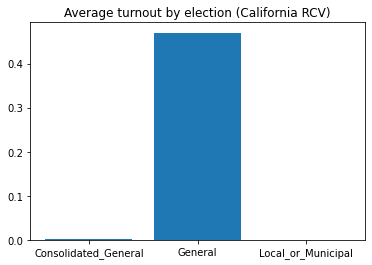

In [30]:
plt.bar(['Consolidated_General', 'General', 'Local_or_Municipal'], avg_turnout_by_election_type_rcv)
plt.title('Average turnout by election (California RCV)')

In [31]:
avg_turnout_by_election_type_non_rcv = non_rcv_df.groupby(['elec_type']).mean()['total_turnout']
avg_turnout_by_election_type_non_rcv

elec_type
Consolidated_General    0.009333
General                 0.427100
Local_or_Municipal      0.001417
Name: total_turnout, dtype: float64

Text(0.5, 1.0, 'Average turnout by election (California Non-RCV)')

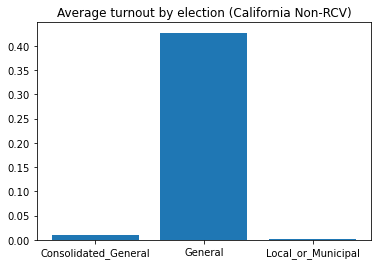

In [32]:
plt.bar(['Consolidated_General', 'General', 'Local_or_Municipal'], avg_turnout_by_election_type_non_rcv)
plt.title('Average turnout by election (California Non-RCV)')

In [39]:
ca_merged_df[ca_merged_df['Residence_Addresses_City']=='Oakland']['CommercialData_EstimatedHHIncomeAmount']

0    115534.731762
1    115534.731762
2    115534.731762
3    115534.731762
4    115534.731762
5    115534.731762
6    115534.731762
7    115534.731762
Name: CommercialData_EstimatedHHIncomeAmount, dtype: float64

### Income by election type

In [47]:
ca_merged_df.columns

Index(['Residence_Addresses_City', 'elec_date', 'elec_year', 'elec_type',
       'total_voters_asian', 'total_voters_black', 'total_voters_hispanic',
       'total_voters_others', 'total_voters_white', 'voted_voters_asian',
       'voted_voters_black', 'voted_voters_hispanic', 'voted_voters_others',
       'voted_voters_white', 'perc_turnout_asian', 'perc_turnout_black',
       'perc_turnout_hispanic', 'perc_turnout_others', 'perc_turnout_white',
       'FECDonors_TotalDonationsAmount', 'FECDonors_NumberOfDonations',
       'mean_donation', 'total_voters_$1000-14999',
       'total_voters_$100000-124999', 'total_voters_$125000-149999',
       'total_voters_$15000-24999', 'total_voters_$150000-174999',
       'total_voters_$175000-199999', 'total_voters_$200000-249999',
       'total_voters_$25000-34999', 'total_voters_$250000+',
       'total_voters_$35000-49999', 'total_voters_$50000-74999',
       'total_voters_$75000-99999', 'voted_voters_$1000-14999',
       'voted_voters_$100000-1

In [43]:
consolidated_general_df = ca_merged_df[ca_merged_df['elec_type']=='Consolidated_General']
general_df = ca_merged_df[ca_merged_df['elec_type']=='General']
local_municipal_df = ca_merged_df[ca_merged_df['elec_type']=='Local_or_Municipal']

In [71]:
income_cols = ['voted_voters_$1000-14999',
               'voted_voters_$100000-124999', 'voted_voters_$125000-149999',
               'voted_voters_$15000-24999', 'voted_voters_$150000-174999',
               'voted_voters_$175000-199999', 'voted_voters_$200000-249999',
               'voted_voters_$25000-34999', 'voted_voters_$250000+',
               'voted_voters_$35000-49999', 'voted_voters_$50000-74999',
               'voted_voters_$75000-99999']

ordered_income_cols = ['voted_voters_$1000-14999',
                      'voted_voters_$15000-24999',
                      'voted_voters_$25000-34999',
                      'voted_voters_$35000-49999',
                      'voted_voters_$50000-74999',
                      'voted_voters_$75000-99999',
                      'voted_voters_$100000-124999',
                      'voted_voters_$125000-149999',
                      'voted_voters_$150000-174999',
                      'voted_voters_$175000-199999',
                      'voted_voters_$200000-249999',
                      'voted_voters_$250000+']

consolidated_general_income = consolidated_general_df[income_cols].drop_duplicates().sum(axis=0)
general_income = general_df[income_cols].drop_duplicates().sum(axis=0)
local_municipal_income = local_municipal_df[income_cols].drop_duplicates().sum(axis=0)

consolidated_general_income = consolidated_general_income.reindex(ordered_income_cols)
general_income = general_income.reindex(ordered_income_cols)
local_municipal_income = local_municipal_income.reindex(ordered_income_cols)

consolidated_general

voted_voters_$1000-14999        920.0
voted_voters_$15000-24999      1298.0
voted_voters_$25000-34999      1836.0
voted_voters_$35000-49999      3943.0
voted_voters_$50000-74999      9418.0
voted_voters_$75000-99999      8655.0
voted_voters_$100000-124999    6009.0
voted_voters_$125000-149999    5607.0
voted_voters_$150000-174999    3209.0
voted_voters_$175000-199999    2769.0
voted_voters_$200000-249999    3532.0
voted_voters_$250000+          3188.0
dtype: float64

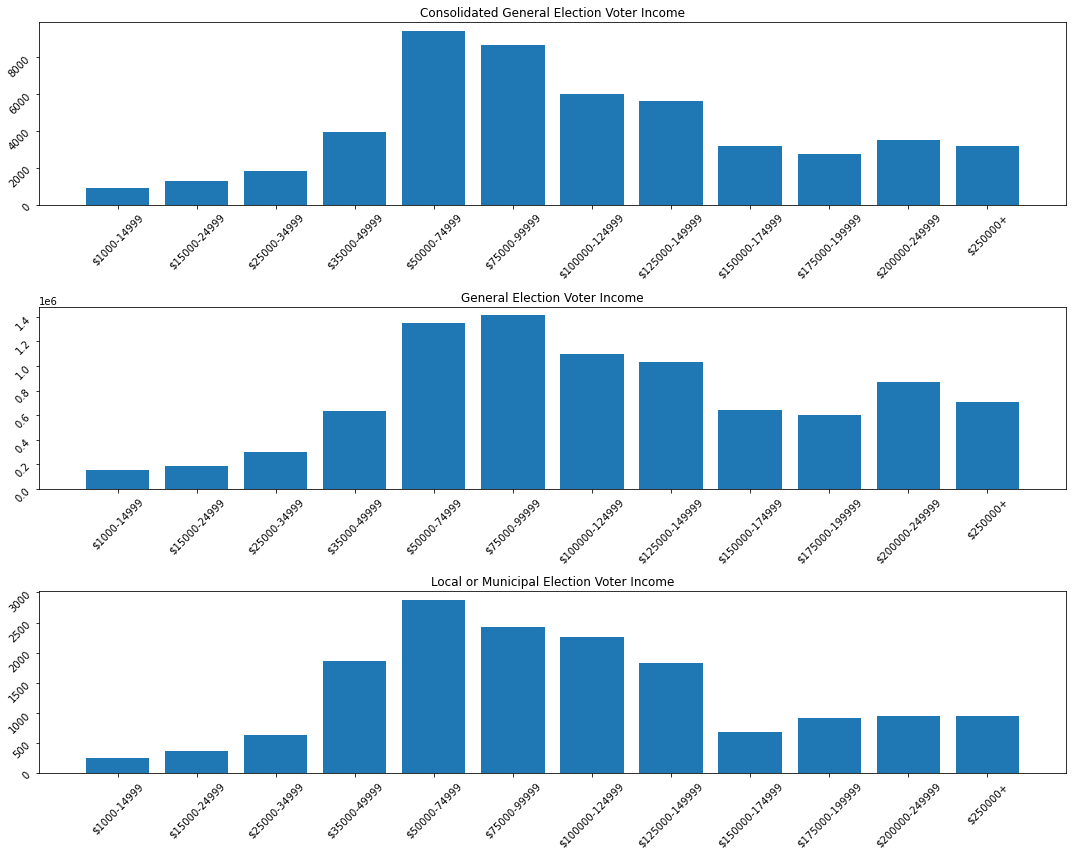

In [86]:
x_labels = ['$1000-14999',
          '$15000-24999',
          '$25000-34999',
          '$35000-49999',
          '$50000-74999',
          '$75000-99999',
          '$100000-124999',
          '$125000-149999',
          '$150000-174999',
          '$175000-199999',
          '$200000-249999',
          '$250000+']

fig, axs = plt.subplots(3, figsize=(15, 12))


axs[0].bar(x_labels, consolidated_general_income)
axs[0].title.set_text('Consolidated General Election Voter Income')
axs[0].tick_params(labelrotation=45)

axs[1].bar(x_labels, general_income)
axs[1].title.set_text('General Election Voter Income')
axs[1].tick_params(labelrotation=45)

axs[2].bar(x_labels, local_municipal_income)
axs[2].title.set_text('Local or Municipal Election Voter Income')
axs[2].tick_params(labelrotation=45)

fig.tight_layout()